In [1]:
import numpy as np
import pandas as pd
import os
print(os.listdir(r"C:\Users\sambi\Desktop\Weather Recognition"))
print(os.listdir(r"C:\Users\sambi\Desktop\Weather Recognition\dataset"))

['.ipynb_checkpoints', 'AccVal_acc.png', 'app.py', 'dataset', 'LossVal_loss.png', 'model_CNN.h5', 'Procfile', 'requirements.txt', 'static', 'templates', 'weather_recognition_using_CNN.ipynb']
['cloudy', 'rain', 'shine', 'sunrise']


In [2]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
from tensorflow.keras.layers import Dense, Flatten,Layer, Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from keras import Model
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras.models import Sequential
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

In [3]:
rain = os.listdir(r'C:\Users\sambi\Desktop\Weather Recognition\dataset\rain')
print(rain[:5])

cloudy = os.listdir(r'C:\Users\sambi\Desktop\Weather Recognition\dataset\cloudy')
print('\n')
print(cloudy[:5])

sunrise = os.listdir(r'C:\Users\sambi\Desktop\Weather Recognition\dataset\sunrise')
print('\n')
print(sunrise[:5])

shine = os.listdir(r'C:\Users\sambi\Desktop\Weather Recognition\dataset\shine')
print('\n')
print(shine[:5])

['rain1.jpg', 'rain10.jpg', 'rain100.jpg', 'rain101.jpg', 'rain102.jpg']


['cloudy1.jpg', 'cloudy10.jpg', 'cloudy100.jpg', 'cloudy101.jpg', 'cloudy102.jpg']


['sunrise1.jpg', 'sunrise10.jpg', 'sunrise100.jpg', 'sunrise101.jpg', 'sunrise102.jpg']


['shine1.jpg', 'shine10.jpg', 'shine100.jpg', 'shine101.jpg', 'shine102.jpg']


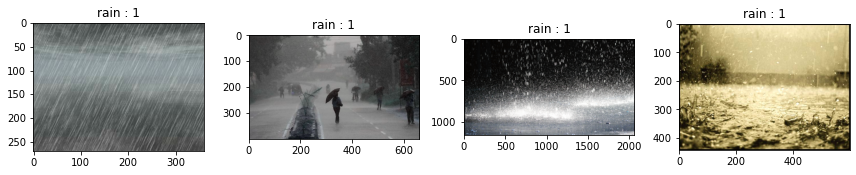

In [4]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(r'C:\Users\sambi\Desktop\Weather Recognition\dataset\rain' + "/" + rain[i])
    plt.imshow(img)
    plt.title('rain : 1')
    plt.tight_layout()
plt.show()

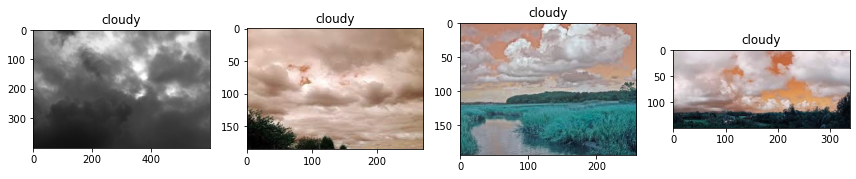

In [5]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(r'C:\Users\sambi\Desktop\Weather Recognition\dataset\cloudy' + "/" + cloudy[i])
    plt.imshow(img)
    plt.title('cloudy')
    plt.tight_layout()
plt.show()

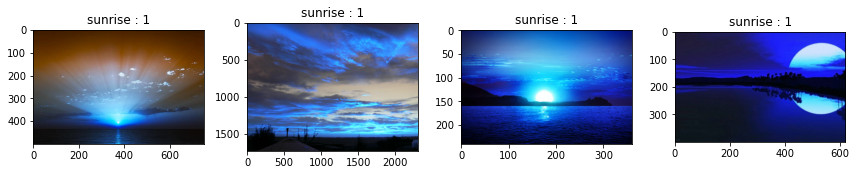

In [6]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(r'C:\Users\sambi\Desktop\Weather Recognition\dataset\sunrise' + "/" + sunrise[i])
    plt.imshow(img)
    plt.title('sunrise : 1')
    plt.tight_layout()
plt.show()

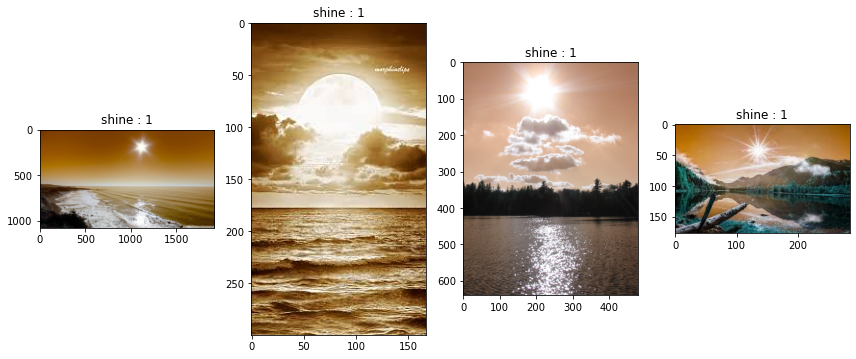

In [7]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(r'C:\Users\sambi\Desktop\Weather Recognition\dataset\shine' + "/" + shine[i])
    plt.imshow(img)
    plt.title('shine : 1')
    plt.tight_layout()
plt.show()

In [8]:
X = []
y = []
for img in rain:
    try:
        img_read = cv2.imread(r'C:\Users\sambi\Desktop\Weather Recognition\dataset\rain' + "/" + img)
        img_resize = cv2.resize(img_read,  (224, 224))
        img_array = img_to_array(img_resize)
        X.append(img_array)
        y.append(0)
    except:
        pass
    
        
for img in cloudy:
    try:
        img_read = cv2.imread(r'C:\Users\sambi\Desktop\Weather Recognition\dataset\cloudy' + "/" + img)
        img_resize = cv2.resize(img_read, (224, 224))
        img_array = img_to_array(img_resize)
        X.append(img_array)
        y.append(1)
    except:
        pass

for img in sunrise:
    try:
        img_read = cv2.imread(r'C:\Users\sambi\Desktop\Weather Recognition\dataset\sunrise' + "/" + img)
        img_resize = cv2.resize(img_read, (224, 224))
        img_array = img_to_array(img_resize)
        X.append(img_array)
        y.append(2)
    except:
        pass

for img in shine:
    try:
        img_read = cv2.imread(r'C:\Users\sambi\Desktop\Weather Recognition\dataset\shine' + "/" + img)
        img_resize = cv2.resize(img_read, (224, 224))
        img_array = img_to_array(img_resize)
        X.append(img_array)
        y.append(3)
    except:
        pass

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)


In [10]:
X_train = np.array(X_train) 
X_test = np.array(X_test)

In [11]:
type(X_train[0])

numpy.ndarray

In [12]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(898, 224, 224, 3) (225, 224, 224, 3) (898,) (225,)


In [15]:
print("Shape of Training Image data: ", X_train.shape)
print("Shape of Testing Image data: ", X_test.shape)
print("Shape of Training Label: ", y_train.shape)
print("Shape of Training Label: ", y_test.shape)

Shape of Training Image data:  (898, 224, 224, 3)
Shape of Testing Image data:  (225, 224, 224, 3)
Shape of Training Label:  (898,)
Shape of Training Label:  (225,)


In [16]:
y_train = np_utils.to_categorical(y_train, num_classes = 4)
y_test = np_utils.to_categorical(y_test, num_classes = 4)

In [17]:
X_train[0].shape

(224, 224, 3)

In [18]:
y_train[200]

array([0., 1., 0., 0.], dtype=float32)

In [19]:
print(X_train[0], y_train[0])

[[[0.2        0.1764706  0.19607843]
  [0.19607843 0.17254902 0.19215687]
  [0.19607843 0.17254902 0.19215687]
  ...
  [0.31764707 0.57254905 0.77254903]
  [0.40784314 0.6666667  0.8627451 ]
  [0.43137255 0.69411767 0.8862745 ]]

 [[0.19607843 0.17254902 0.19215687]
  [0.19607843 0.17254902 0.19215687]
  [0.19215687 0.16862746 0.1882353 ]
  ...
  [0.24705882 0.4862745  0.68235296]
  [0.34509805 0.5882353  0.78039217]
  [0.41568628 0.65882355 0.8509804 ]]

 [[0.19215687 0.16862746 0.19215687]
  [0.19215687 0.16862746 0.19215687]
  [0.1882353  0.16470589 0.1882353 ]
  ...
  [0.19607843 0.4117647  0.6       ]
  [0.28627452 0.5019608  0.6901961 ]
  [0.38039216 0.59607846 0.78039217]]

 ...

 [[0.07058824 0.15686275 0.42352942]
  [0.07058824 0.15686275 0.42352942]
  [0.06666667 0.15686275 0.41960785]
  ...
  [0.04705882 0.04313726 0.05098039]
  [0.04705882 0.04313726 0.05098039]
  [0.04705882 0.04313726 0.05098039]]

 [[0.07058824 0.15294118 0.40392157]
  [0.07450981 0.15294118 0.40784314]


In [20]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation= 'relu', input_shape= (224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 394272)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                12616736  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 132       
Total params: 12,617,764
Trainable params: 12,617,764
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ["accuracy"])

In [23]:
r = model.fit(X_train, y_train, batch_size = 100, epochs = 10, validation_data = (X_test, y_test) )

Epoch 1/10
9/9 [==============================] - 55s 5s/step - loss: 9.2489 - accuracy: 0.3897 - val_loss: 4.5257 - val_accuracy: 0.5111
Epoch 2/10
9/9 [==============================] - 20s 2s/step - loss: 2.3777 - accuracy: 0.6180 - val_loss: 1.4556 - val_accuracy: 0.6800
Epoch 3/10
9/9 [==============================] - 22s 2s/step - loss: 1.1820 - accuracy: 0.7459 - val_loss: 0.5812 - val_accuracy: 0.8267
Epoch 4/10
9/9 [==============================] - 20s 2s/step - loss: 0.4792 - accuracy: 0.8540 - val_loss: 0.6132 - val_accuracy: 0.8000
Epoch 5/10
9/9 [==============================] - 22s 2s/step - loss: 0.4066 - accuracy: 0.8632 - val_loss: 0.4941 - val_accuracy: 0.8356
Epoch 6/10
9/9 [==============================] - 22s 3s/step - loss: 0.3379 - accuracy: 0.8890 - val_loss: 0.3966 - val_accuracy: 0.8622
Epoch 7/10
9/9 [==============================] - 21s 2s/step - loss: 0.2872 - accuracy: 0.9223 - val_loss: 0.3546 - val_accuracy: 0.8978
Epoch 8/10
9/9 [==================

In [24]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 2s 260ms/step - loss: 0.3241 - accuracy: 0.8978


[0.32405316829681396, 0.897777795791626]

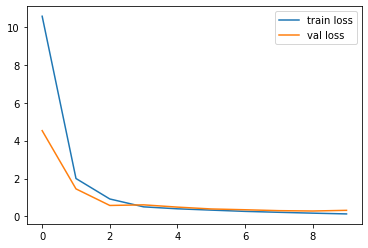

<Figure size 432x288 with 0 Axes>

In [25]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

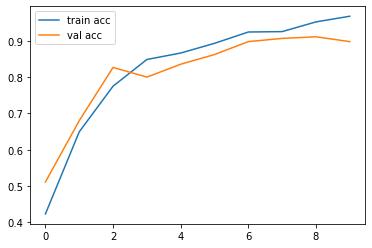

<Figure size 432x288 with 0 Axes>

In [26]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred

array([[3.43660236e-06, 5.74808195e-02, 1.33248868e-05, 9.42502439e-01],
       [8.82216918e-05, 5.56438870e-04, 9.99355018e-01, 3.06683546e-07],
       [8.23819101e-01, 1.67857677e-01, 2.82732304e-03, 5.49599621e-03],
       [5.20180954e-10, 9.49609992e-15, 1.00000000e+00, 8.85286243e-14],
       [3.39518941e-04, 2.65105302e-03, 1.40741099e-06, 9.97008026e-01],
       [2.61412561e-03, 1.02161810e-01, 8.93348336e-01, 1.87571172e-03],
       [7.64717460e-02, 8.08969557e-01, 2.89769407e-04, 1.14268899e-01],
       [1.75815634e-02, 8.85580480e-01, 3.74707319e-02, 5.93673065e-02],
       [9.09020960e-01, 8.70548561e-02, 3.13442061e-03, 7.89731450e-04],
       [1.22426148e-03, 2.03032866e-02, 9.78465855e-01, 6.52913195e-06],
       [2.55485048e-07, 3.05031631e-02, 3.15045850e-06, 9.69493449e-01],
       [1.27439098e-05, 3.15315843e-01, 2.62538437e-04, 6.84408903e-01],
       [7.49292076e-02, 8.74721885e-01, 1.44952396e-02, 3.58536914e-02],
       [5.29775023e-02, 9.14068103e-01, 2.30603572e

In [29]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [30]:
y_pred

array([3, 2, 0, 2, 3, 2, 1, 1, 0, 2, 3, 3, 1, 1, 1, 1, 2, 1, 3, 1, 2, 3,
       2, 0, 1, 2, 2, 1, 1, 3, 1, 1, 2, 3, 0, 3, 1, 2, 1, 2, 0, 1, 2, 0,
       1, 2, 2, 2, 3, 2, 1, 2, 2, 1, 0, 0, 2, 2, 1, 1, 3, 3, 2, 1, 1, 3,
       2, 3, 3, 3, 1, 0, 3, 0, 1, 0, 2, 3, 2, 0, 1, 2, 2, 0, 3, 0, 2, 2,
       1, 1, 2, 2, 3, 2, 0, 3, 1, 2, 3, 1, 1, 0, 3, 3, 2, 3, 2, 2, 3, 1,
       0, 0, 0, 3, 1, 3, 1, 1, 1, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 0, 3,
       1, 3, 1, 1, 2, 3, 0, 3, 0, 2, 2, 1, 3, 0, 3, 1, 1, 0, 2, 3, 2, 3,
       1, 2, 3, 3, 2, 0, 2, 2, 1, 2, 3, 2, 2, 0, 1, 2, 1, 1, 0, 3, 0, 0,
       2, 1, 0, 2, 2, 1, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1,
       2, 2, 3, 0, 0, 2, 2, 1, 3, 2, 1, 1, 1, 2, 2, 3, 0, 2, 0, 1, 2, 0,
       1, 2, 1, 1, 2], dtype=int64)

In [31]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_CNN.h5')

In [32]:
from tensorflow.keras.preprocessing import image

In [33]:
model=load_model('model_CNN.h5')

In [54]:
img=image.load_img(r'C:\Users\sambi\Desktop\Weather Recognition\dataset\sunrise\sunrise15.jpg',target_size=(224,224))

In [55]:
x=image.img_to_array(img)
x

array([[[ 76.,   0.,   0.],
        [ 78.,   0.,   0.],
        [ 78.,   0.,   0.],
        ...,
        [153.,   0.,   0.],
        [153.,   0.,   0.],
        [151.,   0.,   0.]],

       [[ 78.,   0.,   0.],
        [ 78.,   0.,   0.],
        [ 78.,   0.,   0.],
        ...,
        [156.,   0.,   0.],
        [154.,   0.,   0.],
        [154.,   0.,   0.]],

       [[ 78.,   0.,   0.],
        [ 78.,   0.,   0.],
        [ 78.,   0.,   0.],
        ...,
        [156.,   0.,   0.],
        [154.,   0.,   0.],
        [154.,   0.,   0.]],

       ...,

       [[140., 136., 127.],
        [154., 150., 141.],
        [123., 119., 110.],
        ...,
        [174., 140., 112.],
        [175., 141., 113.],
        [181., 147., 119.]],

       [[140., 136., 127.],
        [154., 150., 141.],
        [123., 119., 110.],
        ...,
        [174., 140., 112.],
        [175., 141., 113.],
        [181., 147., 119.]],

       [[148., 144., 135.],
        [140., 136., 127.],
        [118., 1

In [56]:
x.shape

(224, 224, 3)

In [57]:
x=x/255

In [58]:
x

array([[[0.29803923, 0.        , 0.        ],
        [0.30588236, 0.        , 0.        ],
        [0.30588236, 0.        , 0.        ],
        ...,
        [0.6       , 0.        , 0.        ],
        [0.6       , 0.        , 0.        ],
        [0.5921569 , 0.        , 0.        ]],

       [[0.30588236, 0.        , 0.        ],
        [0.30588236, 0.        , 0.        ],
        [0.30588236, 0.        , 0.        ],
        ...,
        [0.6117647 , 0.        , 0.        ],
        [0.6039216 , 0.        , 0.        ],
        [0.6039216 , 0.        , 0.        ]],

       [[0.30588236, 0.        , 0.        ],
        [0.30588236, 0.        , 0.        ],
        [0.30588236, 0.        , 0.        ],
        ...,
        [0.6117647 , 0.        , 0.        ],
        [0.6039216 , 0.        , 0.        ],
        [0.6039216 , 0.        , 0.        ]],

       ...,

       [[0.54901963, 0.53333336, 0.49803922],
        [0.6039216 , 0.5882353 , 0.5529412 ],
        [0.48235294, 0

In [59]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [60]:
model.predict(img_data)

array([[0., 0., 0., 1.]], dtype=float32)

In [61]:
a=np.argmax(model.predict(img_data), axis=1)

In [62]:
print(a)

[3]


In [63]:
a==1

array([False])